In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor


In [16]:
df = pd.read_csv('data/small_feature_vectors.csv')
labels = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 10 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   #id                                                 15 non-null     object 
 1   average_sentence_length_in_token                    15 non-null     float64
 2   average_characters_per_word                         15 non-null     float64
 3   average_syllables_per_word                          15 non-null     float64
 4   text_length_in_token                                15 non-null     int64  
 5   average_number_of_noun_phrases_per_sentence         15 non-null     float64
 6   average_heights                                     15 non-null     float64
 7   average_number_of_subordinate_clauses_per_sentence  15 non-null     float64
 8   average_number_of_pronouns_per_sentence             15 non-null     float64
 9   a

In [17]:
df['label'] = labels.tolist()

In [18]:
df

,#id,average_sentence_length_in_token,average_characters_per_word,average_syllables_per_word,text_length_in_token,average_number_of_noun_phrases_per_sentence,average_heights,average_number_of_subordinate_clauses_per_sentence,average_number_of_pronouns_per_sentence,average_number_of_definite_articles_per_sentence,label
0,miniklexi_0,7.285714,4.862745,1.627451,102,2.285714,4.071429,0.071429,0.642857,0.142857,0.0
1,miniklexi_1,8.090909,4.494382,1.539326,89,2.454545,4.272727,0.000000,0.090909,1.454545,0.0
2,miniklexi_2,7.666667,4.521739,1.634783,115,2.933333,3.866667,0.333333,0.533333,1.400000,0.0
3,miniklexi_3,7.578947,5.000000,1.743056,144,2.263158,3.894737,0.157895,0.631579,0.631579,0.0
4,miniklexi_4,7.571429,5.132075,1.877358,106,2.642857,4.000000,0.142857,0.714286,0.714286,0.0
5,klexikon_0,10.954545,4.850622,1.597510,241,3.318182,4.727273,0.545455,1.363636,0.681818,0.5
6,klexikon_1,10.480000,4.809160,1.614504,262,3.320000,4.920000,0.320000,0.760000,1.520000,0.5
7,klexikon_2,10.073171,4.932203,1.726392,413,3.463415,4.487805,0.536585,0.902439,1.268293,0.5
8,klexikon_3,9.500000,5.345538,1.846682,437,2.869565,4.413043,0.152174,0.543478,0.978261,0.5
9,klexikon_4,10.195122,5.550239,2.040670,418,3.560976,4.560976,0.609756,1.121951,1.463415,0.5


In [32]:
data = df.drop(["#id","label"],  axis='columns')
data

,average_sentence_length_in_token,average_characters_per_word,average_syllables_per_word,text_length_in_token,average_number_of_noun_phrases_per_sentence,average_heights,average_number_of_subordinate_clauses_per_sentence,average_number_of_pronouns_per_sentence,average_number_of_definite_articles_per_sentence
0,7.285714,4.862745,1.627451,102,2.285714,4.071429,0.071429,0.642857,0.142857
1,8.090909,4.494382,1.539326,89,2.454545,4.272727,0.000000,0.090909,1.454545
2,7.666667,4.521739,1.634783,115,2.933333,3.866667,0.333333,0.533333,1.400000
3,7.578947,5.000000,1.743056,144,2.263158,3.894737,0.157895,0.631579,0.631579
4,7.571429,5.132075,1.877358,106,2.642857,4.000000,0.142857,0.714286,0.714286
5,10.954545,4.850622,1.597510,241,3.318182,4.727273,0.545455,1.363636,0.681818
6,10.480000,4.809160,1.614504,262,3.320000,4.920000,0.320000,0.760000,1.520000
7,10.073171,4.932203,1.726392,413,3.463415,4.487805,0.536585,0.902439,1.268293
8,9.500000,5.345538,1.846682,437,2.869565,4.413043,0.152174,0.543478,0.978261
9,10.195122,5.550239,2.040670,418,3.560976,4.560976,0.609756,1.121951,1.463415


In [19]:
column_names = list(df.columns.values)
column_names

['#id',
 'average_sentence_length_in_token',
 'average_characters_per_word',
 'average_syllables_per_word',
 'text_length_in_token',
 'average_number_of_noun_phrases_per_sentence',
 'average_heights',
 'average_number_of_subordinate_clauses_per_sentence',
 'average_number_of_pronouns_per_sentence',
 'average_number_of_definite_articles_per_sentence',
 'label']

In [20]:
df.describe()

,average_sentence_length_in_token,average_characters_per_word,average_syllables_per_word,text_length_in_token,average_number_of_noun_phrases_per_sentence,average_heights,average_number_of_subordinate_clauses_per_sentence,average_number_of_pronouns_per_sentence,average_number_of_definite_articles_per_sentence,label
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,11.209828,5.283053,1.867743,196.533333,3.635899,4.794262,0.537868,0.728698,1.498102,0.500000
std,3.827638,0.605742,0.273676,131.002108,1.296738,0.920822,0.477741,0.410609,0.899919,0.422577
min,7.285714,4.494382,1.539326,58.000000,2.263158,3.866667,0.000000,0.090909,0.142857,0.000000
25%,7.878788,4.856683,1.631117,98.000000,2.756211,4.172078,0.155035,0.516666,0.846274,0.000000
50%,10.195122,5.132075,1.834906,144.000000,3.318182,4.560976,0.536585,0.642857,1.400000,0.500000
75%,13.137362,5.583502,2.041293,251.500000,4.209060,4.921538,0.662021,0.851220,1.760000,1.000000
max,19.333333,6.482759,2.396552,437.000000,6.333333,7.333333,1.666667,1.666667,3.200000,1.000000


#id                                                    object
average_sentence_length_in_token                      float64
average_characters_per_word                           float64
average_syllables_per_word                            float64
text_length_in_token                                    int64
average_number_of_noun_phrases_per_sentence           float64
average_heights                                       float64
average_number_of_subordinate_clauses_per_sentence    float64
average_number_of_pronouns_per_sentence               float64
average_number_of_definite_articles_per_sentence      float64
label                                                 float64
dtype: object


array([[<AxesSubplot:title={'center':'average_sentence_length_in_token'}>,
        <AxesSubplot:title={'center':'average_characters_per_word'}>,
        <AxesSubplot:title={'center':'average_syllables_per_word'}>],
       [<AxesSubplot:title={'center':'text_length_in_token'}>,
        <AxesSubplot:title={'center':'average_number_of_noun_phrases_per_sentence'}>,
        <AxesSubplot:title={'center':'average_heights'}>],
       [<AxesSubplot:title={'center':'average_number_of_subordinate_clauses_per_sentence'}>,
        <AxesSubplot:title={'center':'average_number_of_pronouns_per_sentence'}>,
        <AxesSubplot:title={'center':'average_number_of_definite_articles_per_sentence'}>]],
      dtype=object)

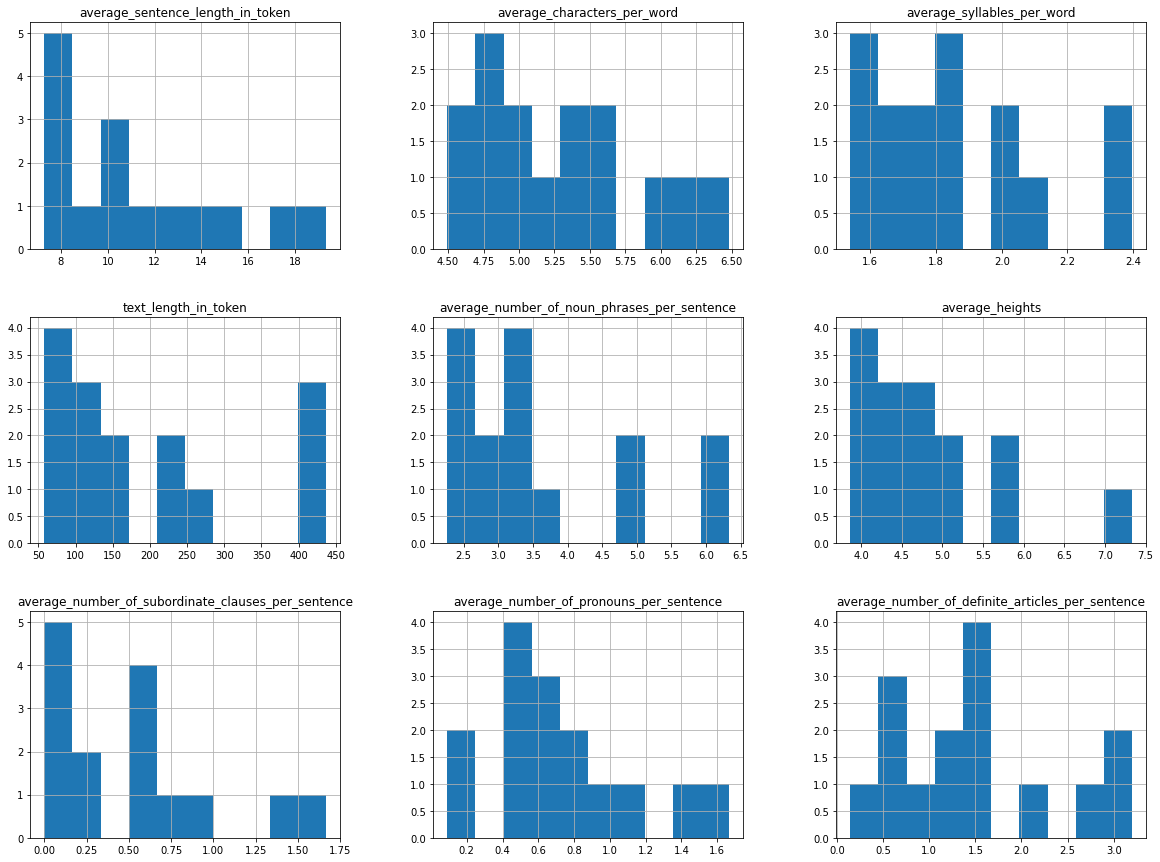

In [21]:
print (df.dtypes)
newdf = df.select_dtypes(include = ["float64", "int64"])
newdf = newdf.drop(["label"],axis=1)
newdf.hist(figsize=(20,15))

In [33]:
X, y = shuffle(data, labels, random_state=0)
X_train = np.array(X[0:10])
X_test = np.array(X[10:15])
y_train = np.array(y[0:10])
y_test = np.array(y[10:15])

In [34]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
print(y_pred)
print(y_test)

[-0.10025619  0.88588016  1.00770487  1.32920399 -0.3539391 ]
[1.  0.  0.  0.5 1. ]


In [24]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [-1.35824390e-01  4.04126642e+00 -8.55545202e+00 -5.52218606e-04
 -7.40028374e-01 -1.31544481e-01  2.58362061e+00  2.60850478e-01
  2.35670320e-01]
Mean squared error: 1.11
Coefficient of determination: -4.53


In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
regress_model = RandomForestRegressor()
regress_model.fit(X_train, y_train)

RandomForestRegressor()

In [27]:
prediction_test = regress_model.predict(X_test)
prediction_train = regress_model.predict(X_train)

print("mean square error train: ", mean_squared_error(prediction_train, y_train))
print("mean square error test: ", mean_squared_error(prediction_test, y_test))

mean square error train:  0.005612500000000001
mean square error test:  0.026355000000000007
